In [2]:
from plotnine import *
import pandas as pd

df = pd.read_csv("/projects/genomic-ml/da2343/ml_project_1/reproduce/results/2024-01-24_20:40_results.csv")
# df has columns: ['Mean Squared Error', 'FoldID', 'Dataset', 'Index of Predicted Column', 'Predicted Column Name', 'Algorithm']
# drop Index of Predicted Column
df = df.drop(columns=['Index of Predicted Column'])

# group df by dataset, algorithm, and predicted column name
# find mean of mean squared error
df = df.groupby(['Dataset', 'Algorithm', 'Predicted Column Name', 'FoldID']).mean().reset_index()

# filter where 'Dataset' contains 'log'
log_df = df[df['Dataset'].str.contains('log')]

log_df

,Dataset,Algorithm,Predicted Column Name,FoldID,Mean Squared Error
0,Dec22_all_log,Featureless,Absidia,0,0.710366
1,Dec22_all_log,Featureless,Absidia,1,0.237030
2,Dec22_all_log,Featureless,Absidia,2,0.246778
3,Dec22_all_log,Featureless,Amanita,0,0.035671
4,Dec22_all_log,Featureless,Amanita,1,0.368040
...,...,...,...,...,...
1549,Dec22_same_soil_log,LassoCV,Umbelopsis,1,0.423550
1550,Dec22_same_soil_log,LassoCV,Umbelopsis,2,0.488846
1551,Dec22_same_soil_log,LassoCV,Wilcoxina,0,0.772904
1552,Dec22_same_soil_log,LassoCV,Wilcoxina,1,0.825649


/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10


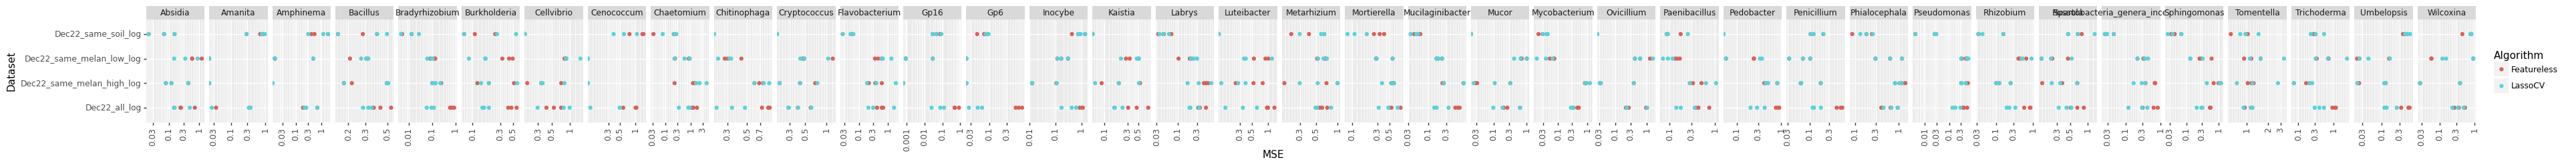

In [18]:

p = ggplot(log_df)
p = p + geom_point(aes(x="Mean Squared Error", y="Dataset", color="Algorithm"))
p = p + facet_grid("~Predicted Column Name", scales="free")
p = p + labs(
    x="MSE", y="Dataset"
)
p = p + theme(axis_text_x=element_text(angle=90))
p = p + theme(figure_size=(45, 2))
p = p + scale_x_log10()
print(p)

In [ ]:
p.save(filename = "plot.png", dpi=3000)


In [ ]:
df